# WHAT IS COMPLIMENTARY SLACKNESS AFTERALL ? 


In [45]:
from IPython.display import Image

# Display the GIF
Image (url="https://i.pinimg.com/originals/34/53/7f/34537f05816bca3f525f6c8859e4aba6.gif")


Let's start from **Principle of Duality** 

Principle of Duality is an optimisation theorem that says any optimisation problem can be viewed as a Primal or Dual Form.

**Primal** - Refers to the original problem ( objective function) that we aim at optimising ( minimising or maximising ) . 

**Dual** - Dual is derived from the objective funciton ( primal problem ); if Primal is minimising, dual will be maximising and vis a vis.
The variables in dual problem are the Lagrangian Multipliers.



   **BUT WHY DO WE NEED DUAL FORM** ?
 1. To simplify our analysis. By evaluating Lagrange Multipliers ( which are dual varibales) , we can understand how primal problem is being varied
 
 2. Sometimes dual problems are easier to solve and understand than the objective function. So it helps in finding a solution to Primal problem . 
 
 3. Computationally efficient to solve dual problems
 
 
 
 
 # How is any of this related to our topic of Complementary Slackness? 
   <span style="color:blue">!!!!   INTRODUCINGGGGGG LINEARR PROGRAMMINGGGG !!!!! </span>
 

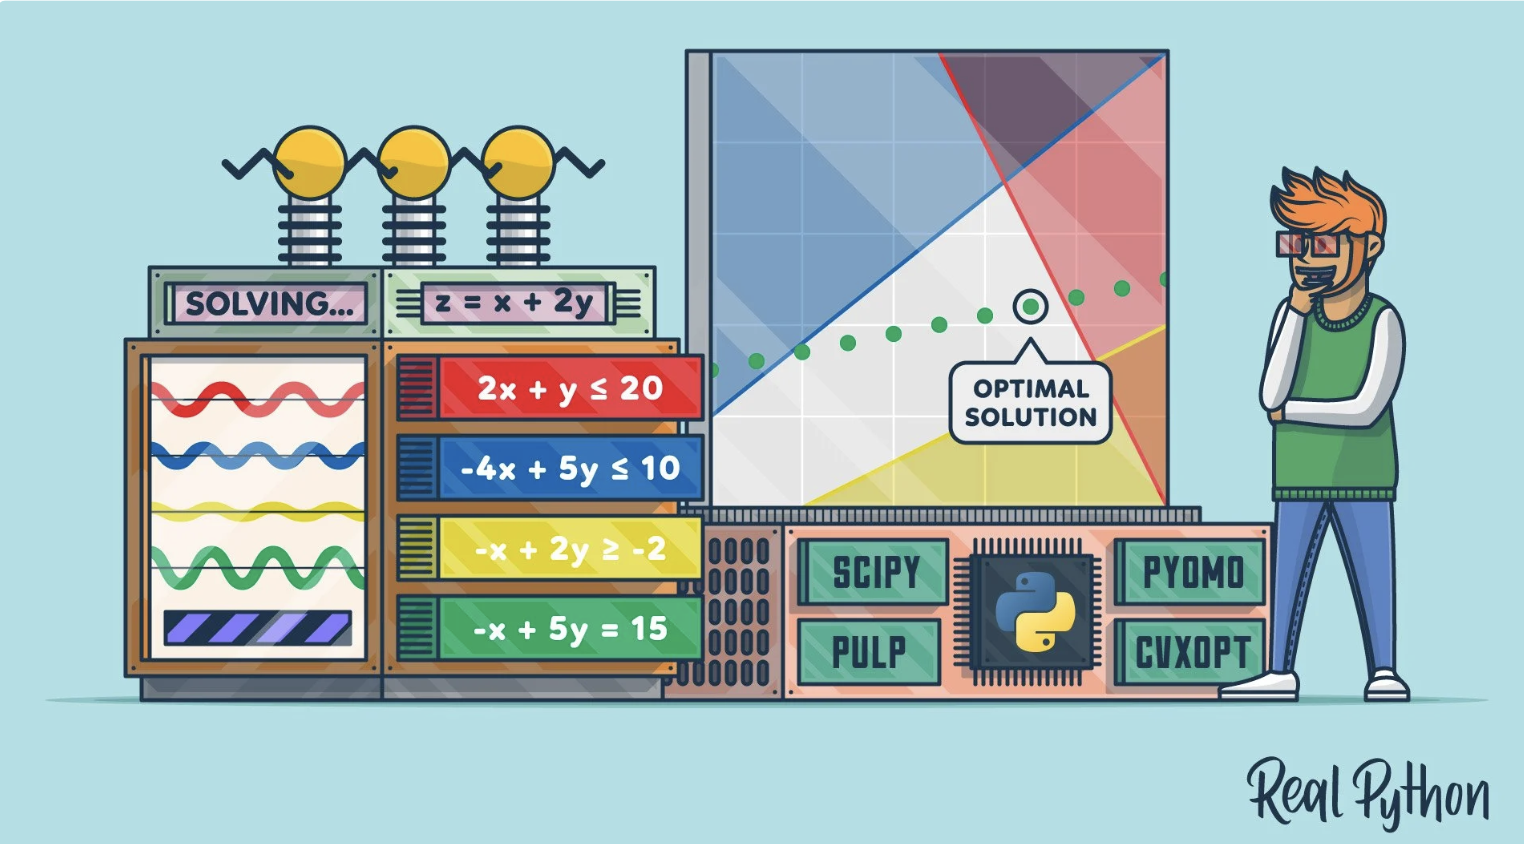

Linear Programming is Mathematical method used used for solving linear equations and inequalities , with or without constraints. Since these can can have many solutions, it helps us in finding solution which maximises or minimises the solution. <span style="color:blue">**LP is related to  primal and dual problems and applying duality theory in optimization**</span>


## **Let's understand this with a real life example:**

Suppose there is a shopkeeper who sells 2 perishable products - Product A & Product B which he purchases from a factory. If the shopkeeper buys too many products and keeps them forever, the products will rot and become damaged, because they are perishable. So he needs to determine the optimal quantity of products he should purchase from the factory to sell to his customers. 

**Objective: Maximise Profit**

**Decision Variables: **

x - number of products A to buy 

y- number of products B to buy

**Constraints:** 
1. Storage Capacity - he can only store limited number of items.
2. Demand Constraint - he can only buy as per the demand of his customers.
3. Non negativity : x and y should be greater than 0 


By formulating the objective (maximizing profit) and constraints, the shopkeeper can use linear programming techniques to find the optimal quantities of Product A and B to buy from  factory.

### Back to the topic- whats the relation bw LP and Complementary Slackness? 

Duality Theory provides several important results:

1. Weak Duality 
2. Strong Duality
    
    
3. **Complementary Slackness** -  It provides insights into the optimality conditions and help understand duality relationship. For optimal solution of the primal & Dual problem , Complementary slackness condition says that **product of primal & dual variables associated with every constraint is equal to 0**
 **It means Variables in one problem are complementary to constraints in other**
 

## <span style="color:red">Complementary Slackness Theorem </span>

Let X* and Y* be optimal solns to Primal & Dual Problems ; and U* and V*  be the values of the Primal and Dual slack variables at optimum point , then 

                            X*.V*  +  Y*.U* = 0 

## Primal Problem 
Maximise    5x + 3y 

Constraints :

2x + y < = 10 ( inequality constraint )

x+3y < = 12 ( inequality constraint )

x, y > = 0 ( negativity constraint )

<br></br>
## Dual Problem  
derived from Primal Problem. 

Minimize: 10u + 12v

Constraints: 

2u + v >= 5 ( inequality constraint )

u + 3v >= 3 ( inequality constraint )

u, v >= 0 ( negativity constraint )

### Things to Observe: 
1) Coefficients of Primal (5,3 ) become the right side value of dual's constraints. 
2) Coefficients of Primal constraint(10,12 ) become coefficient of Dual's Objective Function
3) In Primal , x & y need to be determined whereas in Dual , u and v need to be determined. 
4) Primal aims at maximising the objective function , whereas Dual aims at minimising the objective function. 

In [33]:
import numpy as np
from scipy.optimize import linprog


# Primal Objective Function (5x + 3y)
P = [-5, -3]

# Primal Constraints Coefficients
Primal_constraints = [[2, 1], [1, 3]]

# Right side of P Constraints
b = [10, 12]

# Lower & Upper bounds of variables
x_bounds = (0, None) # x>=0 
y_bounds = (0, None) #y>=0 



# Solve the primal problem
primal_result = linprog(c=P, A_ub=Primal_constraints, b_ub=b, bounds=[x_bounds, y_bounds], method='highs')
primal_optimal_solution = primal_result.x
primal_optimal_value = -primal_result.fun  # *(-1) :convert maximization to minimization




# Dual objective function (10u + 12v )
Dual = [10, 12]

# Dual Constraints Coefficients
Dual_constraints = [[-2, -1], [-1, -3]]

# Right side of Dual Constraints
b_dual = [-5, -3]

# Upper & Lower bounds of dual variables
u_bounds = (0, None) #u > = 0
v_bounds = (0, None) #v > = 0 




# Solve the dual problem
dual_result = linprog(c=Dual, A_ub=Dual_constraints, b_ub=b_dual, bounds=[u_bounds, v_bounds], method='highs')
dual_optimal_solution = dual_result.x
dual_optimal_value = dual_result.fun



# Calculate slack variables
P_slack = np.dot(Primal_constraints, primal_optimal_solution) - b
D_slack = np.dot(Dual_constraints, dual_optimal_solution) - b_dual

# Complementary Slackness
CS = np.dot(primal_optimal_solution, D_slack) + np.dot(dual_optimal_solution, P_slack)




# Printing
print("Primal Solution:", primal_optimal_solution)
print("Dual Solution:", dual_optimal_solution)
print("\n")
print("As per complementary slackness theorem : \n")
print(" (Primal op sol *  Dual slack) + (Dual op sol * Primal Slack) = ",CS.round() )

Primal Solution: [3.6 2.8]
Dual Solution: [2.4 0.2]


As per complementary slackness theorem : 

 (Primal op sol *  Dual slack) + (Dual op sol * Primal Slack) =  0.0
